In [12]:
import pandas as pd
import math
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_log_error
import sklearn
import itertools


In [13]:
df = pd.read_csv("train.csv")
df.datetime = pd.to_datetime(df['datetime'], format = '%Y-%m-%d %H:%M:%S') 
df.index = df['datetime']
# read datetime and added separate columns of year, month, day and hour
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] =df['datetime'].dt.hour
df.isnull().values.any()

False

In [14]:
test = pd.read_csv("test.csv")
test.datetime = pd.to_datetime(test['datetime'], format = '%Y-%m-%d %H:%M:%S') 
test.index = test['datetime']
# read datetime and added separte columns of year, month, day and hour
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] =test['datetime'].dt.hour
test.isnull().values.any()

False

In [15]:
df.columns
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000


In [11]:
var_be_category = ['weather', 'season', 'holiday','workingday', 'year','month','day', 'hour']
for var in var_be_category:
    df[var] = df[var].astype('category') 

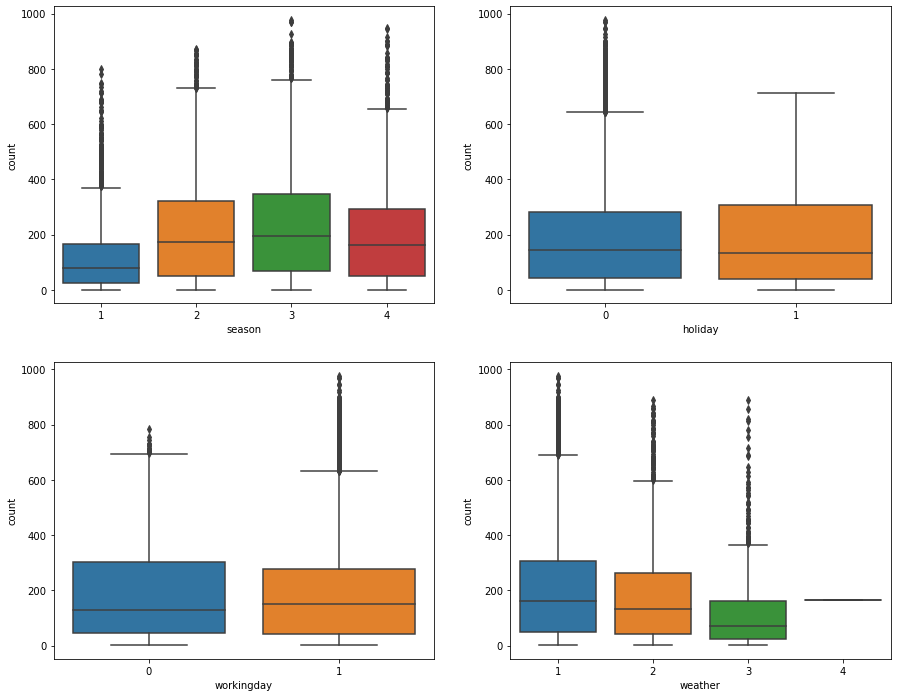

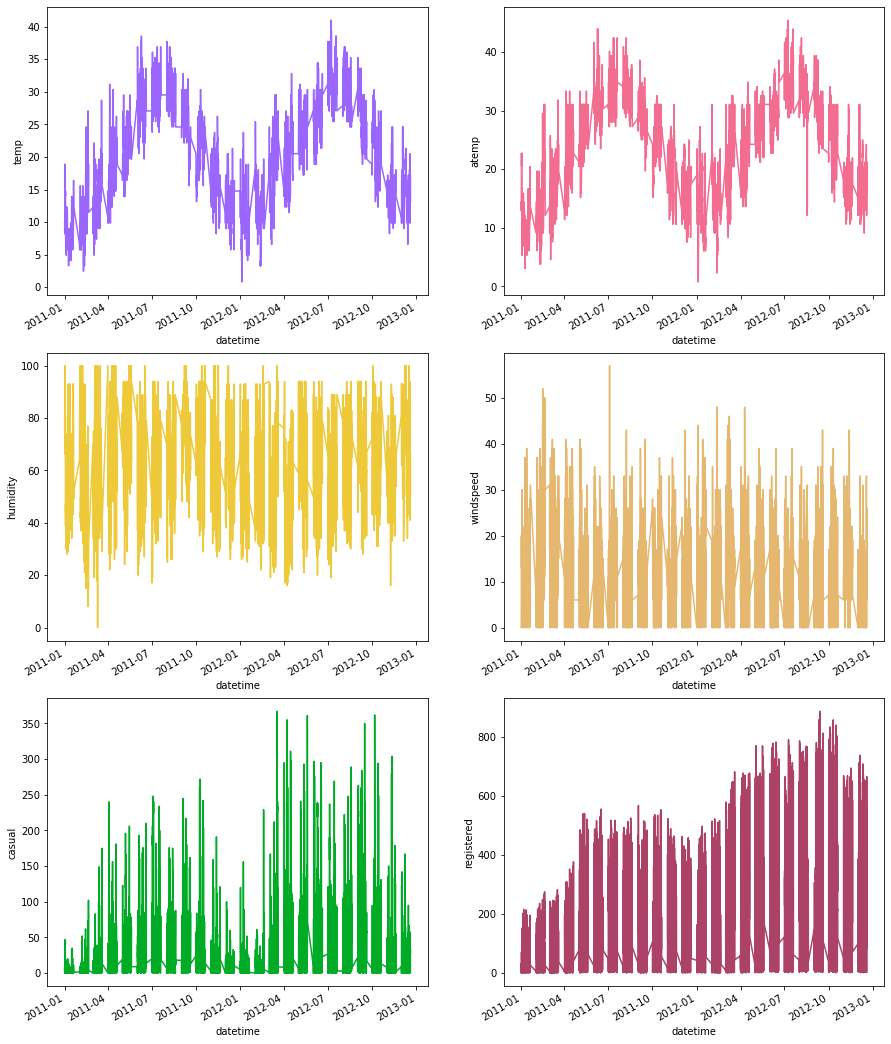

In [8]:


var_to_boxplot = ['season','holiday','workingday','weather']
var_by_overtime = ['temp','atemp','humidity','windspeed','casual','registered']
fig, axes = plt.subplots(2,2,figsize=(15,12))
n = 0
for i,j in list(itertools.product(range(2), range(2))):
    sns.boxplot(x = var_to_boxplot[n], y = 'count', data=df, ax = axes[i,j])
    n = n + 1
n = 0
fig1, axes1 = plt.subplots(3,2,figsize=(15,20))
for i,j in list(itertools.product(range(3), range(2))):
    rgb = np.random.rand(3,)
    df[var_by_overtime[n]].plot(kind = 'line', ax = axes1[i,j],
                                ylabel = var_by_overtime[n], c = rgb)
    n = n + 1

plt.show()

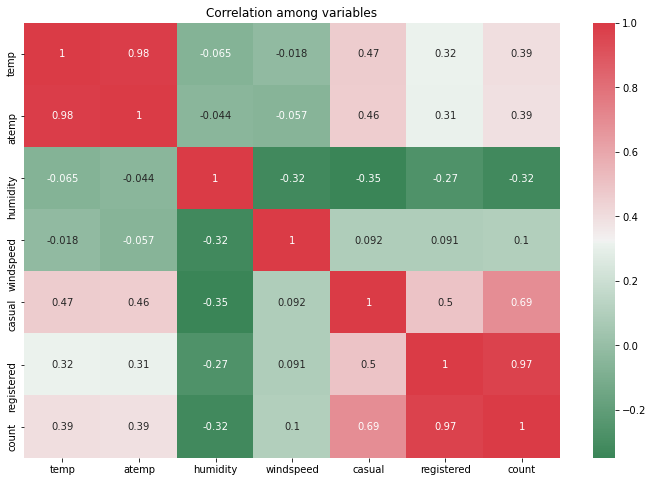

In [10]:
var_corr = df.corr()
cmap = sns.diverging_palette(500, 10, as_cmap=True)
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(var_corr, cmap = cmap,
            xticklabels=var_corr.columns, yticklabels=var_corr.columns,
           ax = ax,annot = True)
plt.title("Correlation among variables")
plt.show()





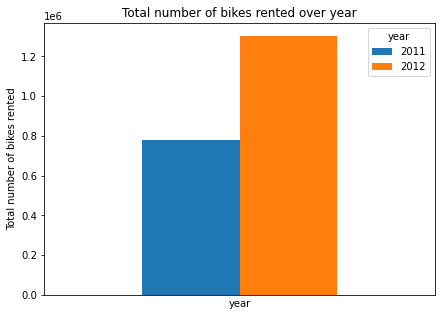

In [8]:

grby_y = df.groupby('year').sum()['count'].to_frame()
fig, ax = plt.subplots(figsize = (7,5))
grby_y.T.plot(kind='bar', rot = 0, ax = ax,
              xlabel = 'year' , xticks = [],
              ylabel = 'Total number of bikes rented',
              title = 'Total number of bikes rented over year')
plt.show()

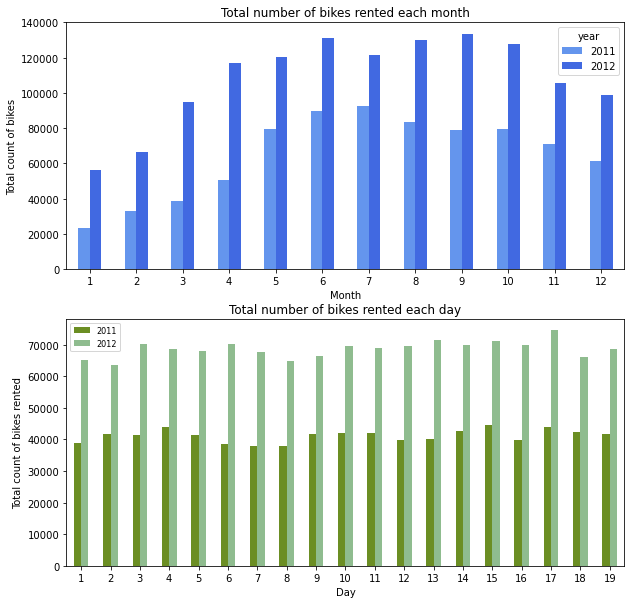

In [9]:
# Distribution of the sum of the count by month or day 

fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
colors1 = ['cornflowerblue', 'royalblue']
colors2 = ['olivedrab', 'darkseagreen']

grby_m = df.groupby(['year','month']).sum()['count'].to_frame().reset_index()
med_cnt_m = grby_m.set_index(['month','year']).unstack()['count']
med_cnt_m.plot(kind="bar", rot = 0, ax = ax1, color = colors1,
              title = "Total number of bikes rented each month",
              xlabel = "Month", ylabel ="Total count of bikes")

grby_d = df.groupby(['year','day']).sum()['count'].to_frame().reset_index()
med_cnt_d = grby_d.set_index(['day','year']).unstack()['count']
med_cnt_d.plot(kind="bar", ax = ax2, rot = 0, color = colors2,
               title = "Total number of bikes rented each day",
               xlabel = "Day", ylabel ="Total count of bikes rented")
plt.legend(fontsize = 8)

plt.show()

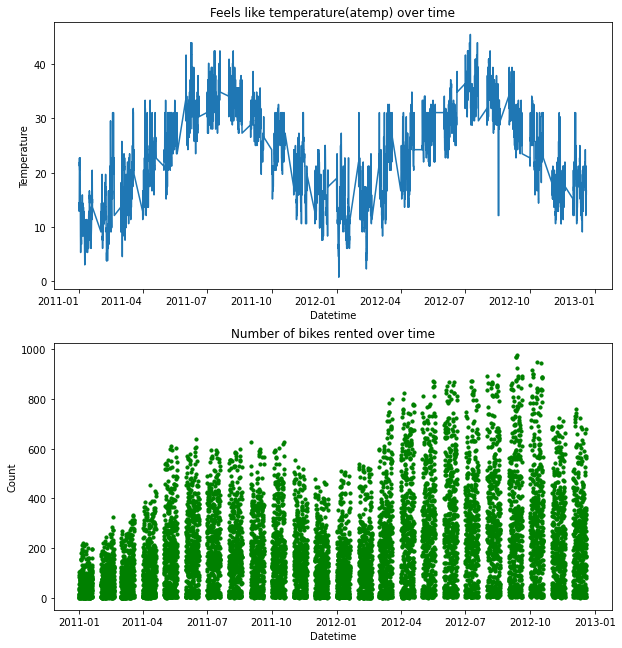

In [10]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,12));
df['datetime']=df.index
df.atemp.plot( ax = ax1, kind = 'line', rot = 0,
              title = 'Feels like temperature(atemp) over time',
              ylabel = 'Temperature', xlabel = 'Datetime')
df.plot.scatter( x ='datetime', y = 'count', ax = ax2,
                s = 10, c = 'green',
               title='Number of bikes rented over time', 
               ylabel = 'Count', xlabel = 'Datetime')
plt.show()

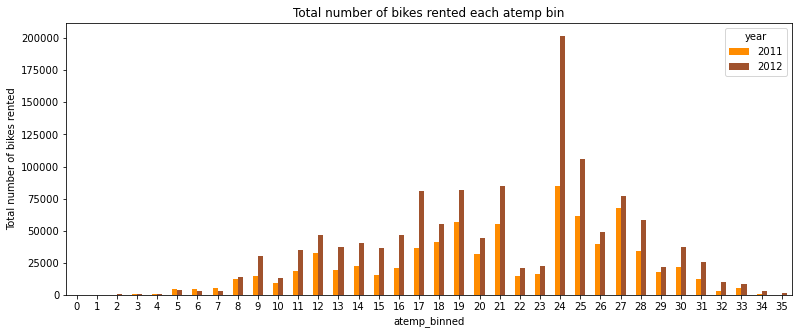

In [11]:

count,atemp_bin_edges = np.histogram(df['atemp'], bins='auto')
atemp_bins = np.append([df['atemp'].min()-1], atemp_bin_edges)
atemp_bin_labels = np.arange(len(atemp_bin_edges))
df['atemp_bined'] = pd.cut(df['atemp'], bins = atemp_bins, labels = atemp_bin_labels)

grby_at = df.groupby(['year','atemp_bined']).sum()['count'].to_frame().reset_index()
med_cnt_at = grby_at.set_index(['atemp_bined','year']).unstack()['count']

fig, ax = plt.subplots(figsize = (13,5))
colors = ('darkorange', 'sienna')
med_cnt_at.plot(kind="bar", ax = ax, rot = 0, color= colors,
                title ="Total number of bikes rented each atemp bin",
                xlabel = "atemp_binned",ylabel = "Total number of bikes rented")
plt.show()

<AxesSubplot:title={'center':'Total number of bikes rented each atemp bin'}, xlabel='Humidity binned', ylabel='Total number of bikes rented'>

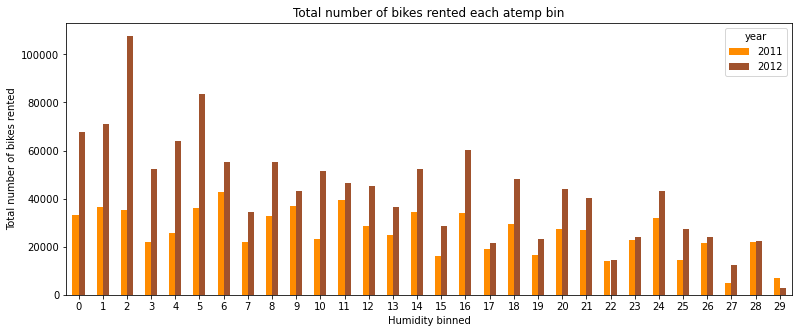

In [12]:
n = 30
df['humid_bined'], humid_bin_edges = pd.qcut(df['humidity'], q =n, labels=range(n), retbins=True)
humid_bins = np.append([df['humidity'].min()-1], humid_bin_edges)

grby_at = df.groupby(['year','humid_bined']).sum()['count'].to_frame().reset_index()
sum_cnt_at = grby_at.set_index(['humid_bined','year']).unstack()['count'] 

fig, ax = plt.subplots(figsize = (13,5))
sum_cnt_at.plot(kind="bar", ax = ax, rot = 0,
                color=colors,
               title ="Total number of bikes rented each atemp bin",
                xlabel = "Humidity binned",ylabel = "Total number of bikes rented")

C:\Users\Riya\anacondaaa\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


                                   Mixed Linear Model Regression Results
Model:                              MixedLM                 Dependent Variable:                 count      
No. Observations:                   10886                   Method:                             REML       
No. Groups:                         2                       Scale:                              4806.5407  
Min. group size:                    5422                    Log-Likelihood:                     -60996.4329
Max. group size:                    5464                    Converged:                          Yes        
Mean group size:                    5443.0                                                                 
-----------------------------------------------------------------------------------------------------------
                                                            Coef.   Std.Err.    z    P>|z|  [0.025   0.975]
---------------------------------------------------------------

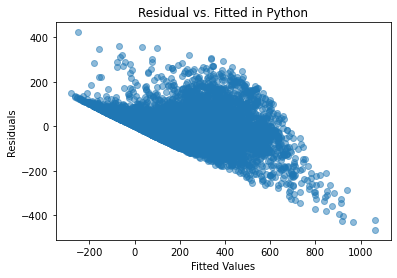

68.73438247304954

In [13]:
# Fit to mixed effects model

mixed = smf.mixedlm("count ~ windspeed + C(atemp_bined, Treatment(0)) \
                    + C(humid_bined, Treatment(0))+ C(year, Treatment(2011)) \
                    +C(hour, Treatment(4)):C(workingday, Treatment(0))\
                    +C(hour, Treatment(4)):C(season, Treatment(1))",
                    df, groups = 'year')
mixed_fit = mixed.fit()
print(mixed_fit.summary())
df['predicted'] = np.array(mixed_fit.predict()).tolist()

plt.scatter(mixed_fit.predict() - mixed_fit.resid, mixed_fit.resid, alpha = 0.5)
plt.title("Residual vs. Fitted in Python")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.show()
np.sqrt(((df['predicted'] - df['count']) ** 2).mean())

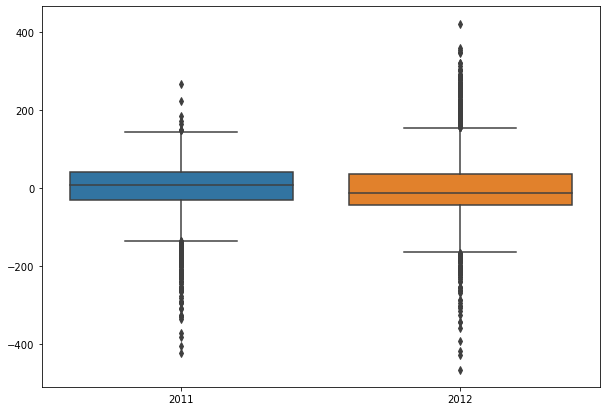

In [14]:
fig = plt.figure(figsize = (10,7))
ax = sns.boxplot(x =mixed_fit.model.groups, y = mixed_fit.resid )

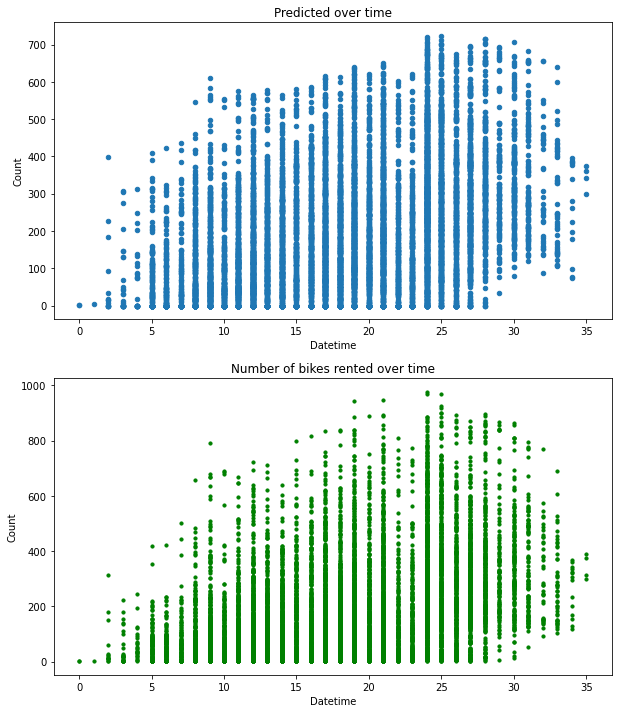

In [15]:
# Scatter plots of prediction and real count

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,12));
ax11 = axs[0]
ax12 = axs[1]
df.loc[df['predicted'] <0, 'predicted'] = 0
df.plot.scatter( x = 'atemp_bined', y = 'predicted', ax = ax11,
              title = 'Predicted over time',
              ylabel = 'Count', xlabel = 'Datetime')
df.plot.scatter( x ='atemp_bined', y = 'count', ax = ax12,
                s = 10, c = 'green',
               title='Number of bikes rented over time', 
               ylabel = 'Count', xlabel = 'Datetime')
plt.show()

In [16]:
mean_squared_log_error(df['count'], df['predicted'])

1.161611776096327

In [17]:
# Dataframe with prediction
df[['predicted', 'count', 'atemp']].head()

,predicted,count,atemp
datetime,,,
2011-01-01 00:00:00,1.754811,16,14.395
2011-01-01 01:00:00,0.000000,40,13.635
2011-01-01 02:00:00,0.000000,32,13.635
2011-01-01 03:00:00,0.000000,13,14.395
2011-01-01 04:00:00,0.000000,1,14.395


In [18]:
# Reformat of test dataset

test.columns
cols = test.columns.tolist()
cols = cols[-3:]+cols[1:-3]
test = test[cols]
test['datetime']=test.index

test['atemp_bined'] = pd.cut(test['atemp'], bins = atemp_bins, labels = atemp_bin_labels)
test['humid_bined'] = pd.cut(test['humidity'], bins = humid_bin_edges, labels = range(n))

In [19]:
# Save prediction for submission

prediction = mixed_fit.predict(test)
submission = pd.DataFrame({'datetime': test.index,
                           'count': prediction})
submission.loc[submission['count'] <0, 'count'] = 0
submission['count'] = submission['count'].fillna(0).astype(int)
submission['count'] = submission['count'].astype(np.int64)
submission.to_csv("./submission.csv",index=False)